# Data Science Pragmatic programming in NLP


Code snippets for quick consult (copy n paste)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

from nltk.corpus import movie_reviews as reviews
import utils as ut
import text_utils as tut


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
!pwd

/mnt/sdb1/leandro/ds_pragmatic_programming


## NLP


### NLP terms
refs: https://www.kdnuggets.com/2017/02/natural-language-processing-key-terms-explained.html

1. corpora or corpus 
    * collection of text
1. semantics
    * semantcs = meaning of the text
1. stop words
    * They are words to be removed because they do not add information or contents to a sentence: Ex: "the", "and" and "a" 

1. Tokenization

    * The process to convert long sentences in small pices called tokens (a word vsn be a token)

1. n-gram: bi-grams and tri-grams
1. skip_gram
1. Stemming
    * process to reduce worfds variations: run, runs, runnig and ran is map to run
1. Lemmatization
    * same idea as Stemming but capture a little bit of meaning. Ex: better, good, awsome can be map to good
1. simillarity measures
    * jaccard
    * leveintein or edit distance



TODO: ADD Code to do 
   
0. BERT Google release in 2018 and beat all the previous model   <= #A very important
1. bag of words
2. use wrodvec
3. glove


for help with BERT
https://blog.insightdatascience.com/using-bert-for-state-of-the-art-pre-training-for-natural-language-processing-1d87142c29e7

https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

clone bert
git clone https://github.com/google-research/bert.git


Use kaglle competition (Good example of multi-label calssifier)
https://medium.com/huggingface/multi-label-text-classification-using-bert-the-mighty-transformer-69714fa3fb3d

Yuo can get the data from kaggle
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview

## Get some data

```python
import nltk

nltk.download('movie_reviews')
```


In [16]:
X = [reviews.raw(fileid) for fileid in reviews.fileids()]
y = [reviews.categories(fileid)[0] for fileid in reviews.fileids()]


In [17]:
X_toy = [
        'plot: attempt movie, movie',
        'plot: it is movie like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch',
        'plot: it is clear that the film'
         ]
X_toy

['plot: attempt movie, movie',
 'plot: it is movie like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch',
 'plot: it is clear that the film']

In [18]:
word_freq_df = tut.get_word_frequency_table(X_toy, stop_words='english', binary=True)
word_freq_df.head(11)

,word_freq,word
9,3,plot
8,2,movie
0,1,attempt
1,1,clear
2,1,film
3,1,indiglo
4,1,invention
5,1,jaded
6,1,like
7,1,make


In [21]:
word_freq_df = tut.get_word_frequency_table(X, stop_words='english', binary=True)


word_freq_df.head(11)


,word_freq,word
13085,1753,film
22959,1554,movie
20351,1497,like
19034,1327,just
35358,1258,time
14895,1182,good
33490,1078,story
5961,1047,character
21167,1017,make
38204,1016,way


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c77d47c90>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c77c9d410>]],
      dtype=object)

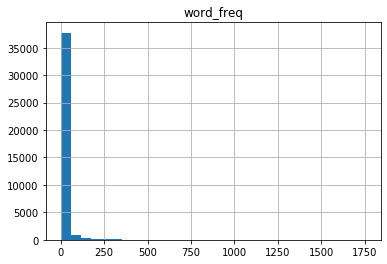

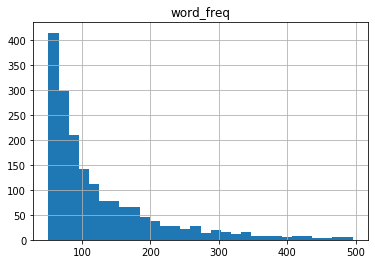

In [31]:
# It is long tail distribution
word_freq_df.hist(column="word_freq",bins=30)

# Just see ROI
word_freq_df[(word_freq_df.word_freq < 500) & (word_freq_df.word_freq > 50)].hist(column="word_freq",bins=30)